# Geospatial data

- Install new module
- Import raster layer
- Import vector layer
- Plot maps
- Get location-specific values

[Source](https://rasterio.readthedocs.io/en/stable/intro.html)

In [2]:
!pip install rasterio

    100% |████████████████████████████████| 26.6MB 677kB/s 
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
import rasterio
import numpy as np
import glob

In [2]:
glob.os.chdir('/Users/andrespatrignani/Dropbox/Teaching/Scientific programming/introcoding-spring-2019/Datasets/')


In [128]:
dataset = rasterio.open('paw_20190501_1km_v1.tif')

A coordinate reference system (CRS) is a coordinate-based local, regional or global system used to locate geographical entities. Spatial reference systems can be referred including EPSG codes defined by the International Association of Oil and Gas Producers.

[https://epsg.io/4326](https://epsg.io/4326)

EPSG:4326 is equal to WGS84 - World Geodetic System 1984

In [129]:
print(dataset.crs)

EPSG:4326


In [130]:
print(dataset.dtypes)

('uint8',)


In [131]:
print(dataset.width)
print(dataset.height)
print(dataset.indexes)

897
362
(1,)


In [132]:
print(dataset.bounds)

BoundingBox(left=-102.058329251, bottom=36.991665186999995, right=-94.58332955, top=40.008331733)


In [133]:
print(dataset.lnglat())

(-98.3208294005, 38.49999846)


In [134]:
dataset.xy(0,0,offset='ul') # center by default. ul, ur, ll, lr.

(-102.058329251, 40.008331733)

In [135]:
dataset_masked = np.ma.masked_equal(dataset.read(),255).astype('uint8')
print(dataset_masked.dtype)
print(dataset_masked.shape)

uint8
(1, 362, 897)


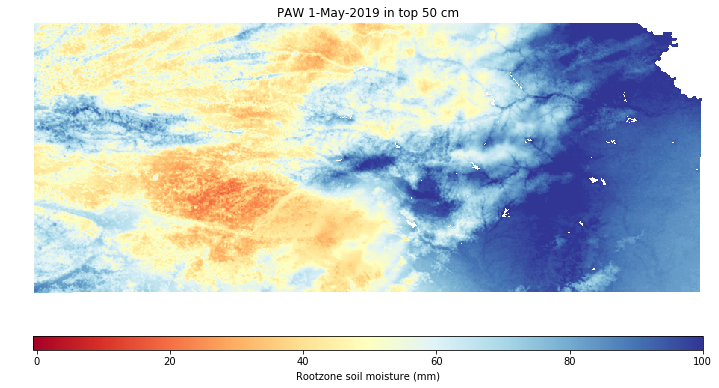

In [143]:
plt.figure(figsize=(12,8))
plt.imshow(dataset_masked[0,:,:], cmap='RdYlBu')
cb = plt.colorbar(ticks=range(0,260,20), 
                  label='Rootzone soil moisture (mm)',
                  orientation="horizontal",
                  pad=0.1,
                  aspect=50)

plt.clim(-0.5, 100)
plt.axis('off')
plt.title('PAW 1-May-2019 in top 50 cm')
plt.show()
